In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
from datetime import date
import dateutil.relativedelta

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
import fbprophet
from fbprophet import Prophet

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import time

Importing plotly failed. Interactive plots will not work.


In [2]:
A=pd.read_csv("issues.csv")

In [3]:
df_data = pd.read_csv('issues.csv', parse_dates=['created_at'])

In [4]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [5]:
week_df = df_data.groupby(df_data['created_at'].dt.day_name()).count().reindex(days)
week_df

,issue_number,OriginationPhase,DetectionPhase,Category,Priority,Status,created_at,closed_at,Author
created_at,,,,,,,,,
Monday,295,295,295,295,295,295,295,139,295
Tuesday,273,273,273,273,273,273,273,89,273
Wednesday,281,281,281,281,281,281,281,150,281
Thursday,298,298,298,298,298,298,298,190,298
Friday,302,302,302,302,302,302,302,109,302
Saturday,273,273,273,273,273,273,273,144,273
Sunday,278,278,278,278,278,278,278,175,278


In [6]:
week_df['created_at'].max()

302

In [7]:
week_df['weekday'] = week_df.index

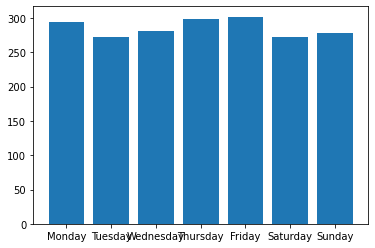

In [8]:
x = week_df['weekday']
y = week_df['issue_number']
plt.bar(x,y)
plt.show()

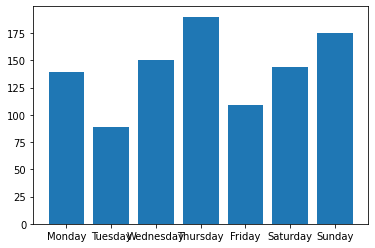

In [9]:
plt.bar(week_df['weekday'],week_df['closed_at'])
plt.show()

In [10]:
A=pd.read_csv("issues.csv")

In [11]:
df_data1 = pd.read_csv('issues.csv', parse_dates=['closed_at'])

In [12]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [13]:
month_df = df_data1.groupby(df_data1['closed_at'].dt.month_name()).count().reindex(months)
month_df

,issue_number,OriginationPhase,DetectionPhase,Category,Priority,Status,created_at,closed_at,Author
closed_at,,,,,,,,,
January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
March,376.0,376.0,376.0,376.0,376.0,376.0,376.0,376.0,376.0
April,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0
May,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0
June,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0
July,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0
August,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0,147.0
September,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0


In [14]:
month_df['month'] = month_df.index

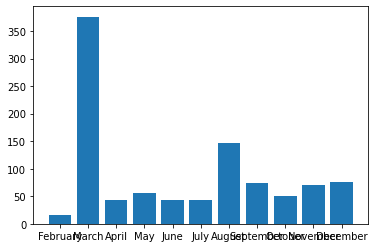

In [15]:
plt.bar(month_df['month'],month_df['closed_at'])
plt.show()

In [16]:
df = pd.read_csv('issues.csv')

<AxesSubplot:xlabel='created_at'>

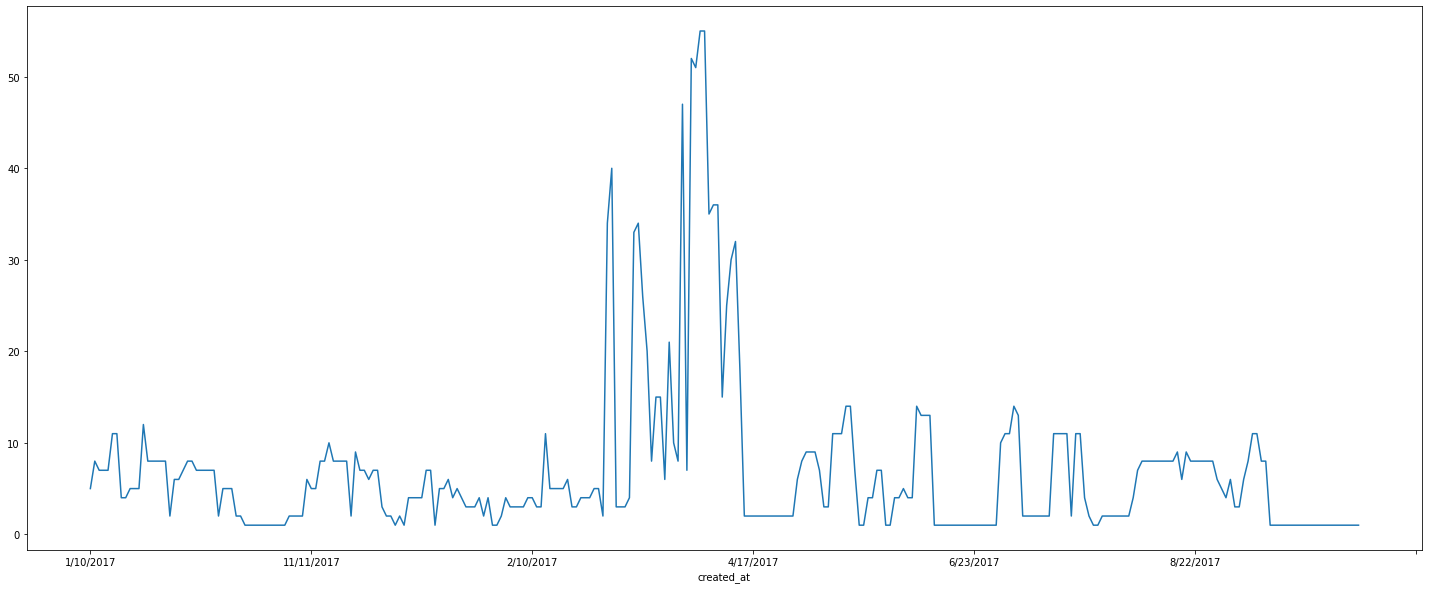

In [17]:
DailyIssue = df.groupby(['created_at']).created_at.count()
DailyIssue.plot(figsize= (25, 10))

In [18]:
df1 = df.groupby(['created_at'], as_index = False).count()
dataFrame = df1[['created_at','issue_number']]
dataFrame.columns = ['ds', 'y']
dataFrame
dataFrame.to_csv (r'github_data.csv', index = None, header=True) 

In [19]:
df = pd.read_csv('github_data.csv')


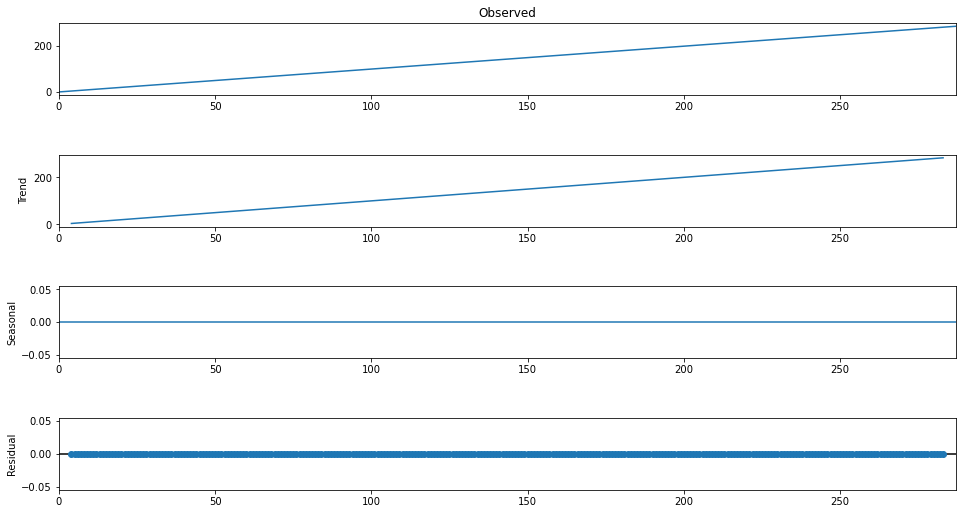

In [20]:
df.set_index('ds')
predict = sm.tsa.seasonal_decompose(df.index, freq=8)
figure = predict.plot()
figure.set_size_inches(15, 8)

<AxesSubplot:>

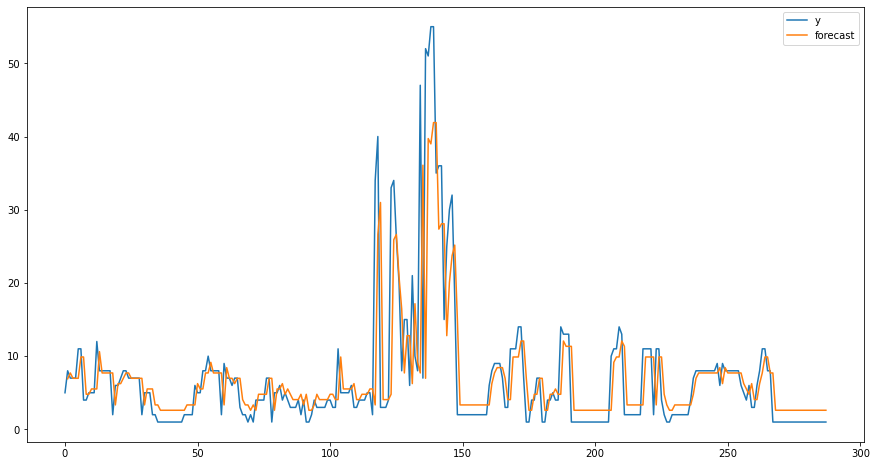

In [21]:
df2 = df
model = sm.tsa.ARIMA(df2['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df2['forecast'] = results.fittedvalues
df2[['y', 'forecast']].plot(figsize=(15,8))


In [22]:
df = pd.read_csv('issues.csv')

<AxesSubplot:xlabel='closed_at'>

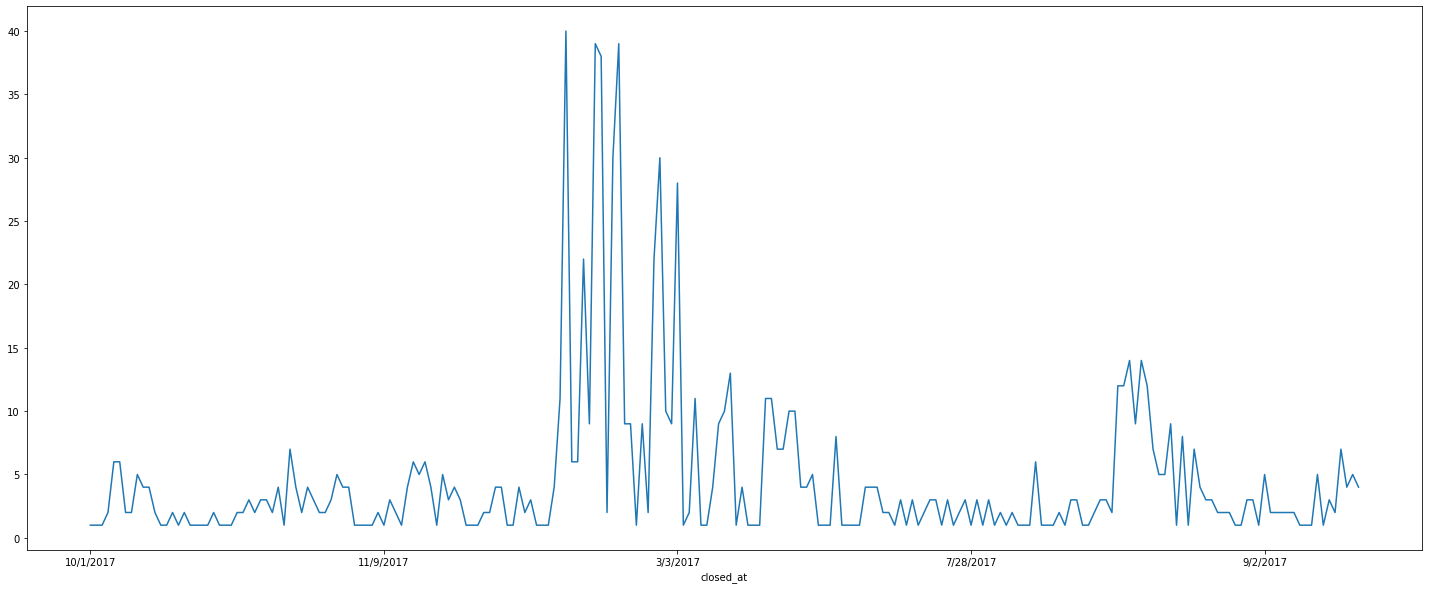

In [23]:
DailyIssue = df.groupby(['closed_at']).created_at.count()
DailyIssue.plot(figsize= (25, 10))

In [24]:
df1 = df.groupby(['closed_at'], as_index = False).count()
dataFrame = df1[['closed_at','issue_number']]
dataFrame.columns = ['ds', 'y']
dataFrame
dataFrame.to_csv (r'github_data.csv', index = None, header=True)

In [25]:
df = pd.read_csv('github_data.csv')

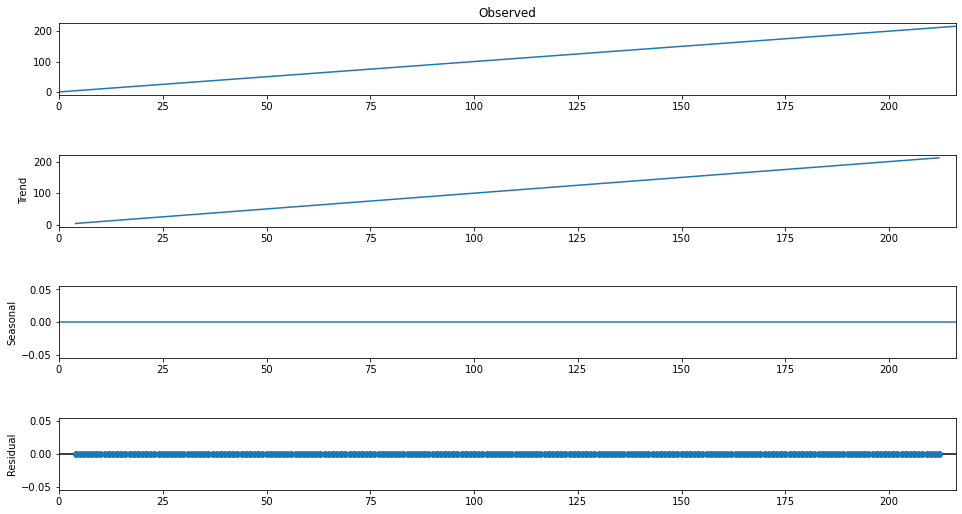

In [26]:
df.set_index('ds')
predict = sm.tsa.seasonal_decompose(df.index, freq=8)
figure = predict.plot()
figure.set_size_inches(15, 8)

<AxesSubplot:>

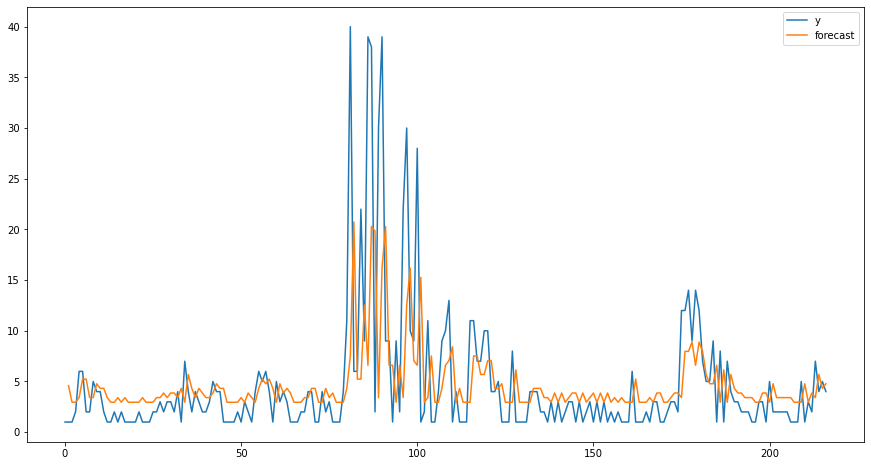

In [27]:
df2 = df
model = sm.tsa.ARIMA(df2['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df2['forecast'] = results.fittedvalues
df2[['y', 'forecast']].plot(figsize=(15,8))